In [1]:
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as python_random

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import regularizers
import pickle

2023-03-15 11:31:34.580309: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
aggregated_data = pickle.load( open( '../data/processed/20230304/aggregated_data', 'rb' ) )

[train_mps_raw_pca, valid_mps_raw_pca, test_mps_raw_pca,
    train_mps_bg_pca, valid_mps_bg_pca, test_mps_bg_pca,
    train_mps_fg_pca, valid_mps_fg_pca, test_mps_fg_pca,
    train_indices_raw_pca, valid_indices_raw_pca, test_indices_raw_pca,
    train_indices_bg_pca, valid_indices_bg_pca, test_indices_bg_pca,
    train_indices_fg_pca, valid_indices_fg_pca, test_indices_fg_pca,
    train_embedding_raw_pca, valid_embedding_raw_pca, test_embedding_raw_pca,
    train_embedding_bg_pca, valid_embedding_bg_pca, test_embedding_bg_pca,
    train_embedding_fg_pca, valid_embedding_fg_pca, test_embedding_fg_pca,
    train_vgg_raw_pca, valid_vgg_raw_pca, test_vgg_raw_pca,
    train_vgg_bg_pca, valid_vgg_bg_pca, test_vgg_bg_pca,
    train_vgg_fg_pca, valid_vgg_fg_pca, test_vgg_fg_pca,
    train_panns_clip_raw_pca, valid_panns_clip_raw_pca, test_panns_clip_raw_pca,
    train_panns_clip_bg_pca, valid_panns_clip_bg_pca, test_panns_clip_bg_pca,
    train_panns_clip_fg_pca, valid_panns_clip_fg_pca, test_panns_clip_fg_pca,
    train_panns_embedding_raw_pca, valid_panns_embedding_raw_pca, test_panns_embedding_raw_pca,
    train_panns_embedding_bg_pca, valid_panns_embedding_bg_pca, test_panns_embedding_bg_pca,
    train_panns_embedding_fg_pca, valid_panns_embedding_fg_pca, test_panns_embedding_fg_pca,
    y_train, y_valid, y_test] = aggregated_data

In [3]:
# # YAMNet
# train_data_raw = np.concatenate((train_mps_raw_pca, train_indices_raw_pca, train_embedding_raw_pca, train_vgg_raw_pca), axis = 1)
# valid_data_raw = np.concatenate((valid_mps_raw_pca, valid_indices_raw_pca, valid_embedding_raw_pca, valid_vgg_raw_pca), axis = 1)
# test_data_raw = np.concatenate((test_mps_raw_pca, test_indices_raw_pca, test_embedding_raw_pca, test_vgg_raw_pca), axis = 1)

# train_data_bg = np.concatenate((train_mps_bg_pca, train_indices_bg_pca, train_embedding_bg_pca, train_vgg_bg_pca), axis = 1)
# valid_data_bg = np.concatenate((valid_mps_bg_pca, valid_indices_bg_pca, valid_embedding_bg_pca, valid_vgg_bg_pca), axis = 1)
# test_data_bg = np.concatenate((test_mps_bg_pca, test_indices_bg_pca, test_embedding_bg_pca, test_vgg_bg_pca), axis = 1)

# train_data_fg = np.concatenate((train_mps_fg_pca, train_indices_fg_pca, train_embedding_fg_pca, train_vgg_fg_pca), axis = 1)
# valid_data_fg = np.concatenate((valid_mps_fg_pca, valid_indices_fg_pca, valid_embedding_fg_pca, valid_vgg_fg_pca), axis = 1)
# test_data_fg = np.concatenate((test_mps_fg_pca, test_indices_fg_pca, test_embedding_fg_pca, test_vgg_fg_pca), axis = 1)

# train_data_all = np.concatenate((train_data_raw, train_data_bg, train_data_fg), axis = 1)
# valid_data_all = np.concatenate((valid_data_raw, valid_data_bg, valid_data_fg), axis = 1)
# test_data_all = np.concatenate((test_data_raw, test_data_bg, test_data_fg), axis = 1)

In [4]:
# # VGG
# train_data_raw = np.concatenate((train_mps_raw_pca, train_indices_raw_pca, train_vgg_raw_pca), axis = 1)
# valid_data_raw = np.concatenate((valid_mps_raw_pca, valid_indices_raw_pca, valid_vgg_raw_pca), axis = 1)
# test_data_raw = np.concatenate((test_mps_raw_pca, test_indices_raw_pca, test_vgg_raw_pca), axis = 1)

# train_data_bg = np.concatenate((train_mps_bg_pca, train_indices_bg_pca, train_vgg_bg_pca), axis = 1)
# valid_data_bg = np.concatenate((valid_mps_bg_pca, valid_indices_bg_pca, valid_vgg_bg_pca), axis = 1)
# test_data_bg = np.concatenate((test_mps_bg_pca, test_indices_bg_pca, test_vgg_bg_pca), axis = 1)

# train_data_fg = np.concatenate((train_mps_fg_pca, train_indices_fg_pca, train_vgg_fg_pca), axis = 1)
# valid_data_fg = np.concatenate((valid_mps_fg_pca, valid_indices_fg_pca, valid_vgg_fg_pca), axis = 1)
# test_data_fg = np.concatenate((test_mps_fg_pca, test_indices_fg_pca, test_vgg_fg_pca), axis = 1)

# train_data_all = np.concatenate((train_data_raw, train_data_bg, train_data_fg), axis = 1)
# valid_data_all = np.concatenate((valid_data_raw, valid_data_bg, valid_data_fg), axis = 1)
# test_data_all = np.concatenate((test_data_raw, test_data_bg, test_data_fg), axis = 1)

In [5]:
# # including panns embeddings
# train_data_raw = np.concatenate((train_mps_raw_pca, train_indices_raw_pca, train_panns_embedding_raw_pca), axis = 1)
# valid_data_raw = np.concatenate((valid_mps_raw_pca, valid_indices_raw_pca, valid_panns_embedding_raw_pca), axis = 1)
# test_data_raw = np.concatenate((test_mps_raw_pca, test_indices_raw_pca, test_panns_embedding_raw_pca), axis = 1)

# train_data_bg = np.concatenate((train_mps_bg_pca, train_indices_bg_pca, train_panns_embedding_bg_pca), axis = 1)
# valid_data_bg = np.concatenate((valid_mps_bg_pca, valid_indices_bg_pca, valid_panns_embedding_bg_pca), axis = 1)
# test_data_bg = np.concatenate((test_mps_bg_pca, test_indices_bg_pca, test_panns_embedding_bg_pca), axis = 1)

# train_data_fg = np.concatenate((train_mps_fg_pca, train_indices_fg_pca, train_panns_embedding_fg_pca), axis = 1)
# valid_data_fg = np.concatenate((valid_mps_fg_pca, valid_indices_fg_pca, valid_panns_embedding_fg_pca), axis = 1)
# test_data_fg = np.concatenate((test_mps_fg_pca, test_indices_fg_pca, test_panns_embedding_fg_pca), axis = 1)

# train_data_all = np.concatenate((train_data_raw, train_data_bg, train_data_fg), axis = 1)
# valid_data_all = np.concatenate((valid_data_raw, valid_data_bg, valid_data_fg), axis = 1)
# test_data_all = np.concatenate((test_data_raw, test_data_bg, test_data_fg), axis = 1)

# Lazy predict

In [6]:
# from lazypredict.Supervised import LazyClassifier
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(train_vgg_bg_pca, valid_vgg_bg_pca, y_train, y_valid)
# models

# Tensorflow parameter tuning

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [8]:
def build_model_narrow(hp):

    model = keras.Sequential()
    model.add(layers.Input(shape=(train_data_raw.shape[1]), dtype=tf.float32))
    drop_rate = hp.Float("dr", min_value=0.2, max_value=0.5, sampling="linear")
#         if hp.Boolean("dropout"):
    model.add(layers.Dropout(rate=drop_rate))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 10)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=10, max_value=200, step=10),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
        model.add(layers.Dropout(rate=drop_rate))
    model.add(layers.Dense(2))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    return model

def build_model_wide(hp):

    model = keras.Sequential()
    model.add(layers.Input(shape=(train_data_all.shape[1]), dtype=tf.float32))
    drop_rate = hp.Float("dr", min_value=0.2, max_value=0.5, sampling="linear")
#         if hp.Boolean("dropout"):
    model.add(layers.Dropout(rate=drop_rate))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 10)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=10, max_value=500, step=50),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
        model.add(layers.Dropout(rate=drop_rate))
    model.add(layers.Dense(2))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    return model

In [9]:
def build_model_AUC_narrow(hp):

    model = keras.Sequential()
    model.add(layers.Input(shape=(train_data_raw.shape[1]), dtype=tf.float32))
    drop_rate = hp.Float("dr", min_value=0.0, max_value=0.5, sampling="linear")
#         if hp.Boolean("dropout"):
    model.add(layers.Dropout(rate=drop_rate))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=16, max_value=256, step=16),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
        model.add(layers.Dropout(rate=drop_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#         loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.AUC(name='AUC')],
    )

    return model

def build_model_AUC_wide(hp):

    model = keras.Sequential()
    model.add(layers.Input(shape=(train_data_all.shape[1]), dtype=tf.float32))
    drop_rate = hp.Float("dr", min_value=0.0, max_value=0.5, sampling="linear")
#         if hp.Boolean("dropout"):
    model.add(layers.Dropout(rate=drop_rate))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=16, max_value=512, step=16),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
        model.add(layers.Dropout(rate=drop_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.AUC(name='AUC')],
    )

    return model

In [10]:
def build_model_bACC_narrow(hp):

    model = keras.Sequential()
    model.add(layers.Input(shape=(train_data_raw.shape[1]), dtype=tf.float32))
    drop_rate = hp.Float("dr", min_value=0.0, max_value=0.5, sampling="linear")
    model.add(layers.Dropout(rate=drop_rate))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=16, max_value=256, step=16),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
        model.add(layers.Dropout(rate=drop_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    threshold = hp.Float("threshold", min_value=0.3, max_value=0.7, sampling="linear")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy(name='binary_accuracy', threshold=threshold)],
    )

    return model

def build_model_bACC_wide(hp):

    model = keras.Sequential()
    model.add(layers.Input(shape=(train_data_all.shape[1]), dtype=tf.float32))
    drop_rate = hp.Float("dr", min_value=0.0, max_value=0.5, sampling="linear")
    model.add(layers.Dropout(rate=drop_rate))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=16, max_value=512, step=16),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
        model.add(layers.Dropout(rate=drop_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    threshold = hp.Float("threshold", min_value=0.3, max_value=0.7, sampling="linear")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy(name='binary_accuracy', threshold=threshold)],
    )

    return model

In [11]:
# panns

directory = '../model/BinaryCrossentropy_bACC'
feat_name = '0315_pannsEmbedding'
objective = 'val_binary_accuracy'


# including panns embeddings
train_data_raw = np.concatenate((train_mps_raw_pca, train_indices_raw_pca, train_panns_embedding_raw_pca), axis = 1)
valid_data_raw = np.concatenate((valid_mps_raw_pca, valid_indices_raw_pca, valid_panns_embedding_raw_pca), axis = 1)
test_data_raw = np.concatenate((test_mps_raw_pca, test_indices_raw_pca, test_panns_embedding_raw_pca), axis = 1)

train_data_bg = np.concatenate((train_mps_bg_pca, train_indices_bg_pca, train_panns_embedding_bg_pca), axis = 1)
valid_data_bg = np.concatenate((valid_mps_bg_pca, valid_indices_bg_pca, valid_panns_embedding_bg_pca), axis = 1)
test_data_bg = np.concatenate((test_mps_bg_pca, test_indices_bg_pca, test_panns_embedding_bg_pca), axis = 1)

train_data_fg = np.concatenate((train_mps_fg_pca, train_indices_fg_pca, train_panns_embedding_fg_pca), axis = 1)
valid_data_fg = np.concatenate((valid_mps_fg_pca, valid_indices_fg_pca, valid_panns_embedding_fg_pca), axis = 1)
test_data_fg = np.concatenate((test_mps_fg_pca, test_indices_fg_pca, test_panns_embedding_fg_pca), axis = 1)

train_data_all = np.concatenate((train_data_raw, train_data_bg, train_data_fg), axis = 1)
valid_data_all = np.concatenate((valid_data_raw, valid_data_bg, valid_data_fg), axis = 1)
test_data_all = np.concatenate((test_data_raw, test_data_bg, test_data_fg), axis = 1)


tuner_raw = kt.BayesianOptimization(build_model_bACC_narrow,
                     objective=objective,
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory=directory,
                     project_name='kt_Bayesian_raw_'+feat_name)

tuner_bg = kt.BayesianOptimization(build_model_bACC_narrow,
                     objective=objective,
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory=directory,
                     project_name='kt_Bayesian_bg_'+feat_name)

tuner_fg = kt.BayesianOptimization(build_model_bACC_narrow,
                     objective=objective,
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory=directory,
                     project_name='kt_Bayesian_fg_'+feat_name)

tuner_all = kt.BayesianOptimization(build_model_bACC_wide,
                     objective=objective,
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory=directory,
                     project_name='kt_Bayesian_all_'+feat_name)


tuner_all.search(train_data_all, y_train, epochs=50, validation_data=(valid_data_all, y_valid), callbacks=[stop_early], use_multiprocessing=True)
tuner_bg.search(train_data_bg, y_train, epochs=50, validation_data=(valid_data_bg, y_valid), callbacks=[stop_early], use_multiprocessing=True)
tuner_raw.search(train_data_raw, y_train, epochs=50, validation_data=(valid_data_raw, y_valid), callbacks=[stop_early], use_multiprocessing=True)
tuner_fg.search(train_data_fg, y_train, epochs=50, validation_data=(valid_data_fg, y_valid), callbacks=[stop_early], use_multiprocessing=True)

Trial 94 Complete [00h 00m 14s]
val_binary_accuracy: 0.6995305418968201

Best val_binary_accuracy So Far: 0.7276995182037354
Total elapsed time: 00h 38m 05s

Search: Running Trial #95

Value             |Best Value So Far |Hyperparameter
0.36349           |0.5               |dr
1                 |1                 |num_layers
208               |224               |units_0
relu              |relu              |activation
0.0001            |0.00076823        |lr
0.47193           |0.47593           |threshold
192               |256               |units_1
16                |208               |units_2
160               |48                |units_3
16                |16                |units_4

Epoch 1/50


/Users/andrewchang/opt/anaconda3/envs/AcousticEnv/lib/python3.8/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


373/373 [==============================] - 2s 3ms/step - loss: 0.8779 - binary_accuracy: 0.5264 - val_loss: 0.6569 - val_binary_accuracy: 0.6177
Epoch 2/50
373/373 [==============================] - 1s 2ms/step - loss: 0.7471 - binary_accuracy: 0.5895 - val_loss: 0.6055 - val_binary_accuracy: 0.6727
Epoch 3/50
373/373 [==============================] - 1s 2ms/step - loss: 0.7006 - binary_accuracy: 0.6283 - val_loss: 0.5850 - val_binary_accuracy: 0.6901
Epoch 4/50
373/373 [==============================] - 1s 2ms/step - loss: 0.6709 - binary_accuracy: 0.6424 - val_loss: 0.5764 - val_binary_accuracy: 0.6989
Epoch 5/50
373/373 [==============================] - 1s 2ms/step - loss: 0.6604 - binary_accuracy: 0.6474 - val_loss: 0.5703 - val_binary_accuracy: 0.7076
Epoch 6/50
373/373 [==============================] - 1s 3ms/step - loss: 0.6472 - binary_accuracy: 0.6599 - val_loss: 0.5689 - val_binary_accuracy: 0.7069
Epoch 7/50
373/373 [==============================] - 1s 2ms/step - loss: 0

In [ ]:
# YAMNet

directory = '../model/BinaryCrossentropy_bACC'
feat_name = '0315_YAMNetEmbedding'
objective = 'val_binary_accuracy'


# YAMNet
train_data_raw = np.concatenate((train_mps_raw_pca, train_indices_raw_pca, train_embedding_raw_pca, train_vgg_raw_pca), axis = 1)
valid_data_raw = np.concatenate((valid_mps_raw_pca, valid_indices_raw_pca, valid_embedding_raw_pca, valid_vgg_raw_pca), axis = 1)
test_data_raw = np.concatenate((test_mps_raw_pca, test_indices_raw_pca, test_embedding_raw_pca, test_vgg_raw_pca), axis = 1)

train_data_bg = np.concatenate((train_mps_bg_pca, train_indices_bg_pca, train_embedding_bg_pca, train_vgg_bg_pca), axis = 1)
valid_data_bg = np.concatenate((valid_mps_bg_pca, valid_indices_bg_pca, valid_embedding_bg_pca, valid_vgg_bg_pca), axis = 1)
test_data_bg = np.concatenate((test_mps_bg_pca, test_indices_bg_pca, test_embedding_bg_pca, test_vgg_bg_pca), axis = 1)

train_data_fg = np.concatenate((train_mps_fg_pca, train_indices_fg_pca, train_embedding_fg_pca, train_vgg_fg_pca), axis = 1)
valid_data_fg = np.concatenate((valid_mps_fg_pca, valid_indices_fg_pca, valid_embedding_fg_pca, valid_vgg_fg_pca), axis = 1)
test_data_fg = np.concatenate((test_mps_fg_pca, test_indices_fg_pca, test_embedding_fg_pca, test_vgg_fg_pca), axis = 1)

train_data_all = np.concatenate((train_data_raw, train_data_bg, train_data_fg), axis = 1)
valid_data_all = np.concatenate((valid_data_raw, valid_data_bg, valid_data_fg), axis = 1)
test_data_all = np.concatenate((test_data_raw, test_data_bg, test_data_fg), axis = 1)


tuner_raw = kt.BayesianOptimization(build_model_bACC_narrow,
                     objective=objective,
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory=directory,
                     project_name='kt_Bayesian_raw_'+feat_name)

tuner_bg = kt.BayesianOptimization(build_model_bACC_narrow,
                     objective=objective,
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory=directory,
                     project_name='kt_Bayesian_bg_'+feat_name)

tuner_fg = kt.BayesianOptimization(build_model_bACC_narrow,
                     objective=objective,
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory=directory,
                     project_name='kt_Bayesian_fg_'+feat_name)

tuner_all = kt.BayesianOptimization(build_model_bACC_wide,
                     objective=objective,
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory=directory,
                     project_name='kt_Bayesian_all_'+feat_name)

tuner_all.search(train_data_all, y_train, epochs=50, validation_data=(valid_data_all, y_valid), callbacks=[stop_early], use_multiprocessing=True)
tuner_bg.search(train_data_bg, y_train, epochs=50, validation_data=(valid_data_bg, y_valid), callbacks=[stop_early], use_multiprocessing=True)
tuner_raw.search(train_data_raw, y_train, epochs=50, validation_data=(valid_data_raw, y_valid), callbacks=[stop_early], use_multiprocessing=True)
tuner_fg.search(train_data_fg, y_train, epochs=50, validation_data=(valid_data_fg, y_valid), callbacks=[stop_early], use_multiprocessing=True)

In [ ]:
# VGG

directory = '../model/BinaryCrossentropy_bACC'
feat_name = '0315_vggEmbedding'
objective = 'val_binary_accuracy'


# VGG
train_data_raw = np.concatenate((train_mps_raw_pca, train_indices_raw_pca, train_vgg_raw_pca), axis = 1)
valid_data_raw = np.concatenate((valid_mps_raw_pca, valid_indices_raw_pca, valid_vgg_raw_pca), axis = 1)
test_data_raw = np.concatenate((test_mps_raw_pca, test_indices_raw_pca, test_vgg_raw_pca), axis = 1)

train_data_bg = np.concatenate((train_mps_bg_pca, train_indices_bg_pca, train_vgg_bg_pca), axis = 1)
valid_data_bg = np.concatenate((valid_mps_bg_pca, valid_indices_bg_pca, valid_vgg_bg_pca), axis = 1)
test_data_bg = np.concatenate((test_mps_bg_pca, test_indices_bg_pca, test_vgg_bg_pca), axis = 1)

train_data_fg = np.concatenate((train_mps_fg_pca, train_indices_fg_pca, train_vgg_fg_pca), axis = 1)
valid_data_fg = np.concatenate((valid_mps_fg_pca, valid_indices_fg_pca, valid_vgg_fg_pca), axis = 1)
test_data_fg = np.concatenate((test_mps_fg_pca, test_indices_fg_pca, test_vgg_fg_pca), axis = 1)

train_data_all = np.concatenate((train_data_raw, train_data_bg, train_data_fg), axis = 1)
valid_data_all = np.concatenate((valid_data_raw, valid_data_bg, valid_data_fg), axis = 1)
test_data_all = np.concatenate((test_data_raw, test_data_bg, test_data_fg), axis = 1)


tuner_raw = kt.BayesianOptimization(build_model_bACC_narrow,
                     objective=objective,
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory=directory,
                     project_name='kt_Bayesian_raw_'+feat_name)

tuner_bg = kt.BayesianOptimization(build_model_bACC_narrow,
                     objective=objective,
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory=directory,
                     project_name='kt_Bayesian_bg_'+feat_name)

tuner_fg = kt.BayesianOptimization(build_model_bACC_narrow,
                     objective=objective,
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory=directory,
                     project_name='kt_Bayesian_fg_'+feat_name)

tuner_all = kt.BayesianOptimization(build_model_bACC_wide,
                     objective=objective,
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory=directory,
                     project_name='kt_Bayesian_all_'+feat_name)

tuner_all.search(train_data_all, y_train, epochs=50, validation_data=(valid_data_all, y_valid), callbacks=[stop_early], use_multiprocessing=True)
tuner_bg.search(train_data_bg, y_train, epochs=50, validation_data=(valid_data_bg, y_valid), callbacks=[stop_early], use_multiprocessing=True)
tuner_raw.search(train_data_raw, y_train, epochs=50, validation_data=(valid_data_raw, y_valid), callbacks=[stop_early], use_multiprocessing=True)
tuner_fg.search(train_data_fg, y_train, epochs=50, validation_data=(valid_data_fg, y_valid), callbacks=[stop_early], use_multiprocessing=True)

In [ ]:
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# tuner_all.search(train_data_all, y_train, epochs=50, validation_data=(valid_data_all, y_valid), callbacks=[stop_early], use_multiprocessing=True)

In [ ]:
# tuner_bg.search(train_data_bg, y_train, epochs=50, validation_data=(valid_data_bg, y_valid), callbacks=[stop_early], use_multiprocessing=True)

In [ ]:
# tuner_raw.search(train_data_raw, y_train, epochs=50, validation_data=(valid_data_raw, y_valid), callbacks=[stop_early], use_multiprocessing=True)

In [ ]:
# tuner_fg.search(train_data_fg, y_train, epochs=50, validation_data=(valid_data_fg, y_valid), callbacks=[stop_early], use_multiprocessing=True)

# Load models

In [18]:
# all
tuner_YAMNet_all = kt.BayesianOptimization(build_model_AUC_wide,
                     objective='AUC',
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory='../model/BinaryCrossentropy_valAUC',
                     project_name='kt_Bayesian_all_0314_YAMNetEmbedding')

tuner_VGG_all = kt.BayesianOptimization(build_model_AUC_wide,
                     objective='AUC',
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory='../model/BinaryCrossentropy_valAUC',
                     project_name='kt_Bayesian_all_0314_vggEmbedding')

tuner_panns_all = kt.BayesianOptimization(build_model_AUC_wide,
                     objective='AUC',
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory='../model/BinaryCrossentropy_valAUC',
                     project_name='kt_Bayesian_all_0314_pannsEmbedding')

# raw
tuner_YAMNet_raw = kt.BayesianOptimization(build_model_AUC_narrow,
                     objective='AUC',
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory='../model/BinaryCrossentropy_valAUC',
                     project_name='kt_Bayesian_raw_0314_YAMNetEmbedding')

tuner_VGG_raw = kt.BayesianOptimization(build_model_AUC_narrow,
                     objective='AUC',
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory='../model/BinaryCrossentropy_valAUC',
                     project_name='kt_Bayesian_raw_0314_vggEmbedding')

tuner_panns_raw = kt.BayesianOptimization(build_model_AUC_narrow,
                     objective='AUC',
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory='../model/BinaryCrossentropy_valAUC',
                     project_name='kt_Bayesian_raw_0314_pannsEmbedding')


# bg
tuner_YAMNet_bg = kt.BayesianOptimization(build_model_AUC_narrow,
                     objective='AUC',
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory='../model/BinaryCrossentropy_valAUC',
                     project_name='kt_Bayesian_bg_0314_YAMNetEmbedding')

tuner_VGG_bg = kt.BayesianOptimization(build_model_AUC_narrow,
                     objective='AUC',
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory='../model/BinaryCrossentropy_valAUC',
                     project_name='kt_Bayesian_bg_0314_vggEmbedding')

tuner_panns_bg = kt.BayesianOptimization(build_model_AUC_narrow,
                     objective='AUC',
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory='../model/BinaryCrossentropy_valAUC',
                     project_name='kt_Bayesian_bg_0314_pannsEmbedding')


# fg
tuner_YAMNet_fg = kt.BayesianOptimization(build_model_AUC_narrow,
                     objective='AUC',
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory='../model/BinaryCrossentropy_valAUC',
                     project_name='kt_Bayesian_fg_0314_YAMNetEmbedding')

tuner_VGG_fg = kt.BayesianOptimization(build_model_AUC_narrow,
                     objective='AUC',
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory='../model/BinaryCrossentropy_valAUC',
                     project_name='kt_Bayesian_fg_0314_vggEmbedding')

tuner_panns_fg = kt.BayesianOptimization(build_model_AUC_narrow,
                     objective='AUC',
                     max_trials=100,
                     num_initial_points=25,
                     seed=23,
                     directory='../model/BinaryCrossentropy_valAUC',
                     project_name='kt_Bayesian_fg_0314_pannsEmbedding')

INFO:tensorflow:Reloading Tuner from ../model/BinaryCrossentropy_valAUC/kt_Bayesian_all_0314_YAMNetEmbedding/tuner0.json
INFO:tensorflow:Reloading Tuner from ../model/BinaryCrossentropy_valAUC/kt_Bayesian_all_0314_vggEmbedding/tuner0.json
INFO:tensorflow:Reloading Tuner from ../model/BinaryCrossentropy_valAUC/kt_Bayesian_all_0314_pannsEmbedding/tuner0.json
INFO:tensorflow:Reloading Tuner from ../model/BinaryCrossentropy_valAUC/kt_Bayesian_raw_0314_YAMNetEmbedding/tuner0.json
INFO:tensorflow:Reloading Tuner from ../model/BinaryCrossentropy_valAUC/kt_Bayesian_raw_0314_vggEmbedding/tuner0.json
INFO:tensorflow:Reloading Tuner from ../model/BinaryCrossentropy_valAUC/kt_Bayesian_raw_0314_pannsEmbedding/tuner0.json
INFO:tensorflow:Reloading Tuner from ../model/BinaryCrossentropy_valAUC/kt_Bayesian_bg_0314_YAMNetEmbedding/tuner0.json
INFO:tensorflow:Reloading Tuner from ../model/BinaryCrossentropy_valAUC/kt_Bayesian_bg_0314_vggEmbedding/tuner0.json
INFO:tensorflow:Reloading Tuner from ../model

In [19]:
tuner_YAMNet_all.results_summary(1)
print('--------------------------------------------------')
tuner_VGG_all.results_summary(1)
print('--------------------------------------------------')
tuner_panns_all.results_summary(1)

Results summary
Results in ../model/BinaryCrossentropy_valAUC/kt_Bayesian_all_0314_YAMNetEmbedding
Showing 1 best trials
Trial summary
Hyperparameters:
dr: 0.5
num_layers: 1
units_0: 16
activation: tanh
lr: 0.0001
units_1: 512
units_2: 512
units_3: 448
units_4: 512
Score: 0.792080283164978
--------------------------------------------------
Results summary
Results in ../model/BinaryCrossentropy_valAUC/kt_Bayesian_all_0314_vggEmbedding
Showing 1 best trials
Trial summary
Hyperparameters:
dr: 0.5
num_layers: 1
units_0: 512
activation: relu
lr: 0.0001
units_1: 512
units_2: 512
units_3: 112
units_4: 512
Score: 0.7862818241119385
--------------------------------------------------
Results summary
Results in ../model/BinaryCrossentropy_valAUC/kt_Bayesian_all_0314_pannsEmbedding
Showing 1 best trials
Trial summary
Hyperparameters:
dr: 0.3708344678072866
num_layers: 4
units_0: 480
activation: relu
lr: 0.00014023399602325874
units_1: 144
units_2: 448
units_3: 240
Score: 0.7980964779853821


In [20]:
tuner_YAMNet_raw.results_summary(1)
print('--------------------------------------------------')
tuner_VGG_raw.results_summary(1)
print('--------------------------------------------------')
tuner_panns_raw.results_summary(1)

Results summary
Results in ../model/BinaryCrossentropy_valAUC/kt_Bayesian_raw_0314_YAMNetEmbedding
Showing 1 best trials
Trial summary
Hyperparameters:
dr: 0.5
num_layers: 1
units_0: 208
activation: tanh
lr: 0.0001
units_1: 32
units_2: 256
units_3: 256
units_4: 256
Score: 0.792046070098877
--------------------------------------------------
Results summary
Results in ../model/BinaryCrossentropy_valAUC/kt_Bayesian_raw_0314_vggEmbedding
Showing 1 best trials
Trial summary
Hyperparameters:
dr: 0.3153756058853852
num_layers: 1
units_0: 224
activation: relu
lr: 0.0001793417336072447
units_1: 128
units_2: 64
units_3: 256
units_4: 80
Score: 0.790640115737915
--------------------------------------------------
Results summary
Results in ../model/BinaryCrossentropy_valAUC/kt_Bayesian_raw_0314_pannsEmbedding
Showing 1 best trials
Trial summary
Hyperparameters:
dr: 0.5
num_layers: 1
units_0: 240
activation: relu
lr: 0.0001
units_1: 128
units_2: 16
units_3: 144
units_4: 16
Score: 0.8059003353118896


In [21]:
tuner_YAMNet_bg.results_summary(1)
print('--------------------------------------------------')
tuner_VGG_bg.results_summary(1)
print('--------------------------------------------------')
tuner_panns_bg.results_summary(1)

Results summary
Results in ../model/BinaryCrossentropy_valAUC/kt_Bayesian_bg_0314_YAMNetEmbedding
Showing 1 best trials
Trial summary
Hyperparameters:
dr: 0.3708344678072866
num_layers: 4
units_0: 240
activation: relu
lr: 0.00014023399602325874
units_1: 80
units_2: 224
units_3: 128
Score: 0.7902377843856812
--------------------------------------------------
Results summary
Results in ../model/BinaryCrossentropy_valAUC/kt_Bayesian_bg_0314_vggEmbedding
Showing 1 best trials
Trial summary
Hyperparameters:
dr: 0.0
num_layers: 1
units_0: 16
activation: relu
lr: 0.01
units_1: 32
units_2: 16
units_3: 256
units_4: 128
Score: 0.7894934415817261
--------------------------------------------------
Results summary
Results in ../model/BinaryCrossentropy_valAUC/kt_Bayesian_bg_0314_pannsEmbedding
Showing 1 best trials
Trial summary
Hyperparameters:
dr: 0.37509061706638847
num_layers: 1
units_0: 160
activation: tanh
lr: 0.00039670825539442226
units_1: 192
units_2: 48
units_3: 256
units_4: 256
Score: 0.

In [22]:
tuner_YAMNet_fg.results_summary(1)
print('--------------------------------------------------')
tuner_VGG_fg.results_summary(1)
print('--------------------------------------------------')
tuner_panns_fg.results_summary(1)

Results summary
Results in ../model/BinaryCrossentropy_valAUC/kt_Bayesian_fg_0314_YAMNetEmbedding
Showing 1 best trials
Trial summary
Hyperparameters:
dr: 0.48339085979399293
num_layers: 1
units_0: 16
activation: relu
lr: 0.0002609603134449437
units_1: 128
units_2: 208
units_3: 128
units_4: 176
Score: 0.7421988844871521
--------------------------------------------------
Results summary
Results in ../model/BinaryCrossentropy_valAUC/kt_Bayesian_fg_0314_vggEmbedding
Showing 1 best trials
Trial summary
Hyperparameters:
dr: 0.27071034394674537
num_layers: 1
units_0: 16
activation: relu
lr: 0.0002868519531845337
units_1: 192
units_2: 80
units_3: 208
units_4: 208
Score: 0.728085458278656
--------------------------------------------------
Results summary
Results in ../model/BinaryCrossentropy_valAUC/kt_Bayesian_fg_0314_pannsEmbedding
Showing 1 best trials
Trial summary
Hyperparameters:
dr: 0.2724259376816388
num_layers: 3
units_0: 112
activation: tanh
lr: 0.0005072938580824256
units_1: 144
uni

# Use the best parameters to build a model

In [23]:
best_hps=tuner_panns_raw.get_best_hyperparameters(num_trials=1)[0]
model = tuner_panns_raw.hypermodel.build(best_hps)
history = model.fit(train_data_raw, y_train, epochs=50, validation_data=(valid_data_raw, y_valid), callbacks=[stop_early], use_multiprocessing=True)

Epoch 1/50


/Users/andrewchang/opt/anaconda3/envs/AcousticEnv/lib/python3.8/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


373/373 [==============================] - 2s 3ms/step - loss: 0.9698 - AUC: 0.5397 - val_loss: 0.6522 - val_AUC: 0.6662
Epoch 2/50
373/373 [==============================] - 1s 2ms/step - loss: 0.8607 - AUC: 0.5919 - val_loss: 0.6059 - val_AUC: 0.7328
Epoch 3/50
373/373 [==============================] - 1s 2ms/step - loss: 0.8018 - AUC: 0.6216 - val_loss: 0.5878 - val_AUC: 0.7578
Epoch 4/50
373/373 [==============================] - 1s 2ms/step - loss: 0.7667 - AUC: 0.6418 - val_loss: 0.5773 - val_AUC: 0.7696
Epoch 5/50
373/373 [==============================] - 1s 2ms/step - loss: 0.7314 - AUC: 0.6662 - val_loss: 0.5732 - val_AUC: 0.7742
Epoch 6/50
373/373 [==============================] - 1s 2ms/step - loss: 0.7194 - AUC: 0.6709 - val_loss: 0.5695 - val_AUC: 0.7782
Epoch 7/50
373/373 [==============================] - 1s 2ms/step - loss: 0.7037 - AUC: 0.6803 - val_loss: 0.5690 - val_AUC: 0.7783
Epoch 8/50
373/373 [==============================] - 1s 2ms/step - loss: 0.6841 - AUC:

In [24]:
val_AUC_per_epoch = history.history['val_AUC']
best_epoch = val_AUC_per_epoch.index(max(val_AUC_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 43


In [25]:
hypermodel = tuner_panns_raw.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(train_data_raw, y_train, epochs=best_epoch, validation_data=(valid_data_raw, y_valid), callbacks=[stop_early], use_multiprocessing=True)

Epoch 1/43
373/373 [==============================] - 1s 3ms/step - loss: 1.0019 - AUC: 0.5250 - val_loss: 0.6563 - val_AUC: 0.6642
Epoch 2/43
373/373 [==============================] - 1s 2ms/step - loss: 0.8772 - AUC: 0.5855 - val_loss: 0.6088 - val_AUC: 0.7312
Epoch 3/43
373/373 [==============================] - 1s 2ms/step - loss: 0.8040 - AUC: 0.6270 - val_loss: 0.5884 - val_AUC: 0.7557
Epoch 4/43
373/373 [==============================] - 1s 2ms/step - loss: 0.7631 - AUC: 0.6489 - val_loss: 0.5742 - val_AUC: 0.7711
Epoch 5/43
373/373 [==============================] - 1s 2ms/step - loss: 0.7456 - AUC: 0.6606 - val_loss: 0.5680 - val_AUC: 0.7788
Epoch 6/43
373/373 [==============================] - 1s 2ms/step - loss: 0.7296 - AUC: 0.6664 - val_loss: 0.5637 - val_AUC: 0.7841
Epoch 7/43
373/373 [==============================] - 1s 3ms/step - loss: 0.7106 - AUC: 0.6767 - val_loss: 0.5622 - val_AUC: 0.7857
Epoch 8/43
373/373 [==============================] - 1s 2ms/step - loss: 0.

In [27]:
eval_result = hypermodel.evaluate(test_data_raw, y_test)
print("[test loss, test accuracy]:", eval_result)

8/8 [==============================] - 0s 2ms/step - loss: 0.5877 - AUC: 0.7560
[test loss, test accuracy]: [0.5876885056495667, 0.755966067314148]


# Plot AUC

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

8/8 [==============================] - 0s 2ms/step


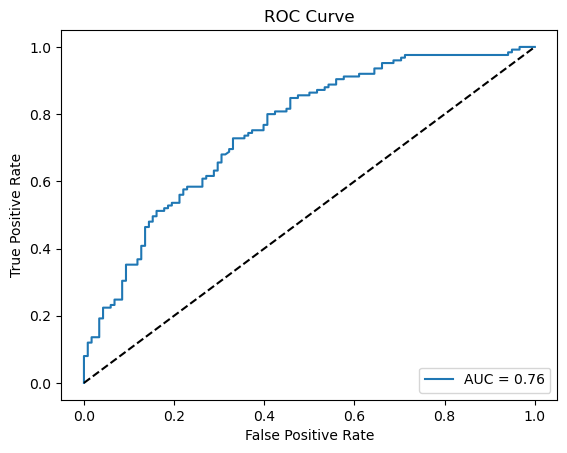

In [31]:
y_pred = hypermodel.predict(test_data_raw).ravel() 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [41]:
(tpr+1-fpr)/2

array([0.5       , 0.504     , 0.54      , 0.53576271, 0.55576271,
       0.55152542, 0.55952542, 0.55105085, 0.57905085, 0.57481356,
       0.59081356, 0.58233898, 0.58633898, 0.58210169, 0.59010169,
       0.58162712, 0.60962712, 0.60538983, 0.62938983, 0.61667797,
       0.62467797, 0.62044068, 0.64044068, 0.63620339, 0.66420339,
       0.6599661 , 0.6679661 , 0.66372881, 0.67172881, 0.66749153,
       0.67549153, 0.66701695, 0.67101695, 0.66677966, 0.67077966,
       0.66654237, 0.67054237, 0.6620678 , 0.6740678 , 0.66983051,
       0.67783051, 0.67359322, 0.67759322, 0.66064407, 0.67264407,
       0.66840678, 0.67240678, 0.6639322 , 0.6719322 , 0.66769492,
       0.67969492, 0.67545763, 0.68745763, 0.68322034, 0.68298305,
       0.68698305, 0.68274576, 0.69874576, 0.6860339 , 0.6900339 ,
       0.68579661, 0.68979661, 0.68555932, 0.68955932, 0.67684746,
       0.68484746, 0.68061017, 0.69661017, 0.68813559, 0.69213559,
       0.67942373, 0.68342373, 0.67918644, 0.69518644, 0.68671